In [3]:
#Code fore assesing the efficacy of size separation method and analyzing differences in larval size after six days of ambient and low pH treatment exposure



In [ ]:

library(ggplot2)
library(dplyr)
library(Rmisc)
library(RVAideMemoire)
library(vegan)
library("lme4")

In [3]:

##################Importing dataframes


#Importing MetaData, which includes size measurements from subsets of larvae (~100) in each LB used during size separation
#These data were taken to ensure a treatment effect on the day of size separation
Day6_LarvalSize_MetaData <- read.csv("Day6_Size_MetaData.csv")
#Subset Day6_LarvalSize_MetaData by treatment
Day6High <- subset(Day6_LarvalSize_MetaData, Treatment == "High") #dataframe of high pH larvae
Day6Low <- subset(Day6_LarvalSize_MetaData, Treatment == "Low") #dataframe of low pH larvae
#Summary Stats for Each treatment subset
Day6High_SummStats <- summarySE(data = Day6High, measurevar = "Length", groupvars = c("LB"))
Day6Low_SummStats <- summarySE(data = Day6Low, measurevar = "Length", groupvars = c("LB"))
#SummaryStats for Size Data
Day6Size_MetaData_SummStats <-  summarySE(data = Day6_LarvalSize_MetaData, measurevar = "Length", groupvars = c("Treatment", "LB"))



##Now importing data from size selected groups. 
###First, the pilot experiment data demonstrating efficacy of size separation method using five size groups
##Remove XS class (i.e. combine extra small and small size classes)
Pilot_SizeSep <- read.csv("PilotSizeSep.csv")
Pilot_SizeSep_SummStats <- summarySE(data = PE2_SizeSel_MetaData_XSRemov, measurevar = "Length", groupvars = c("Treatment", "Size_Class"))


###Current study's data in which two size groups were obtained via pooling of largest and smallest groups
SizeSep <- read.csv("SizeSeparation.csv")
SizeSep_SummStats <- summarySE(data = PE3_SizeSel_TwoGroups_MetaData, measurevar = "Length", groupvars = c("Treatment", "SizeClass"))



In [ ]:

#############################################Statistics#########


In [4]:

#Fist, just look at effect of treatment on larval size on Day 6 (using full distribution phenotype samples)
Day6_LarvalSize_MetaData$LogLength <- log(Day6_LarvalSize_MetaData$Length)
Day6FullSize.model <- aov(LogLength ~ Treatment, data = Day6_LarvalSize_MetaData)
summary(Day6FullSize.model)
#Very significant effect of treatment on larval size




             Df Sum Sq Mean Sq F value Pr(>F)    
Treatment     1 0.8696  0.8696   432.6 <2e-16 ***
Residuals   685 1.3769  0.0020                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [5]:
#Now look for effect of size group on size 
PE3_SizeSel_TwoGroups_MetaData$LogLength <- log(PE3_SizeSel_TwoGroups_MetaData$Length)
Day6SizeGroup.model <- lmer(LogLength ~ SizeClass + Treatment + SizeClass*Treatment + (1 | Treatment),
                            data = PE3_SizeSel_TwoGroups_MetaData)
Day6SizeGroup.model

Day6SizeGroup.null <- lmer(LogLength ~ (1 | Treatment), 
                           data = PE3_SizeSel_TwoGroups_MetaData)

Day6SizeGroup.null

anova(Day6SizeGroup.null,Day6SizeGroup.model )




Linear mixed model fit by REML ['lmerMod']
Formula: LogLength ~ SizeClass + Treatment + SizeClass * Treatment + (1 |  
    Treatment)
   Data: PE3_SizeSel_TwoGroups_MetaData
REML criterion at convergence: -1229.176
Random effects:
 Groups    Name        Std.Dev.
 Treatment (Intercept) 0.03355 
 Residual              0.05672 
Number of obs: 434, groups:  Treatment, 2
Fixed Effects:
                (Intercept)               SizeClassSmall  
                    4.74889                     -0.05671  
               TreatmentLow  SizeClassSmall:TreatmentLow  
                   -0.05317                     -0.02208  

Linear mixed model fit by REML ['lmerMod']
Formula: LogLength ~ (1 | Treatment)
   Data: PE3_SizeSel_TwoGroups_MetaData
REML criterion at convergence: -1110.156
Random effects:
 Groups    Name        Std.Dev.
 Treatment (Intercept) 0.05740 
 Residual              0.06629 
Number of obs: 434, groups:  Treatment, 2
Fixed Effects:
(Intercept)  
      4.686  

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
Day6SizeGroup.null,3,-1109.106,-1096.887,557.5532,-1115.106,NA,NA,NA
Day6SizeGroup.model,6,-1251.263,-1226.825,631.6317,-1263.263,148.1569,3,6.581724e-32


In [ ]:
############################Figures#################

Saving 7 x 7 in image


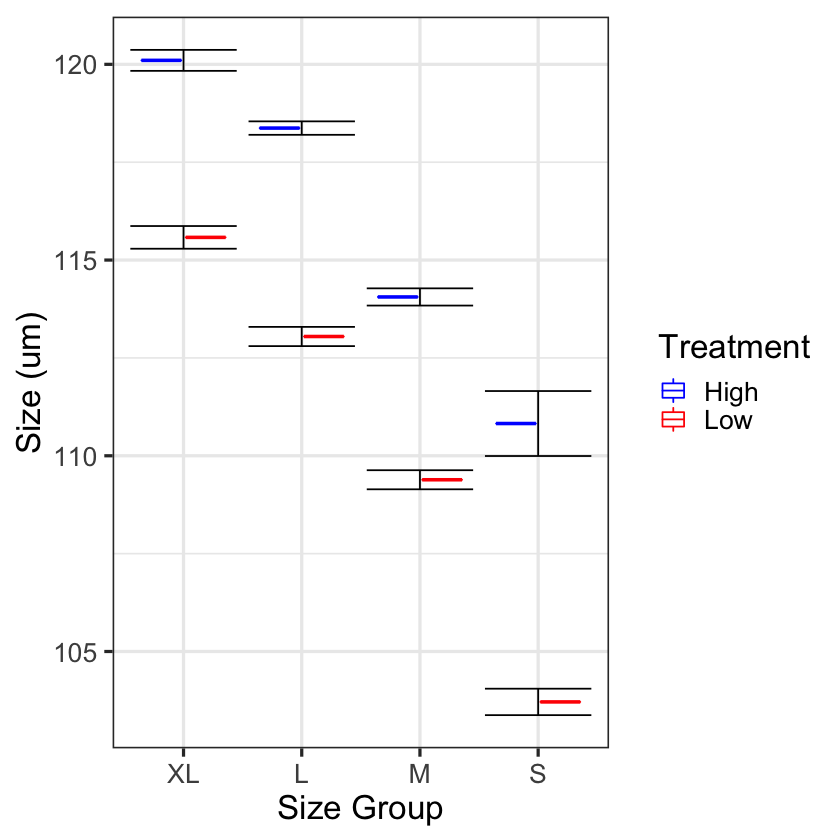

In [6]:

##Pilot data, figure S1 (a)

PilotSizeSep <- ggplot(PE2_SizeSel_SummStats_XSRemov, aes(y = Length, x = Size_Class)) +
  geom_boxplot(aes(colour = Treatment)) +
  scale_x_discrete(limits = c("XL", "L", "M", "S")) +
  scale_colour_manual(values = c("blue", "red")) +
  geom_errorbar(aes(ymin = Length - se, ymax = Length + se)) +
  ylab("Size (um)") +
  theme_bw(base_size = 20) +
  xlab("Size Group")

PilotSizeSep

In [7]:
#Using present study's data. Figure S1 (b)
SizeSep_SummStats$SizeClass <- c("Top_20%", "Bottom_80%", "Top_20%", "Bottom_80%")
SizeSep_SummStats$Treatment <- c("Ambient", "Ambient", "Low", "Low")
SizeSep <- ggplot(PE3_SizeSel_TwoGroups_SummStats, aes(y = Length, x = SizeClass)) +
    geom_boxplot(aes(colour = Treatment)) +
    scale_x_discrete(limits = c("Top_20%", "Bottom_80%")) +
    scale_colour_manual(values = c("blue", "red")) + 
    ylab("Length (um)") +
    geom_errorbar(aes(ymin = Length - se, ymax = Length + se)) +
    theme_bw(base_size = 20)
SizeSep

Saving 7 x 7 in image
